```sql
--Top 10 Tracks

SELECT TOP 10 Track.Name Tracks, COUNT (Invoice.InvoiceId) AS Total_Sales
FROM Track
LEFT JOIN InvoiceLine
ON Track.TrackId = InvoiceLine.TrackId
LEFT JOIN Invoice
ON InvoiceLine.InvoiceId =Invoice.InvoiceId
GROUP BY Track.Name
ORDER BY Total_Sales DESC

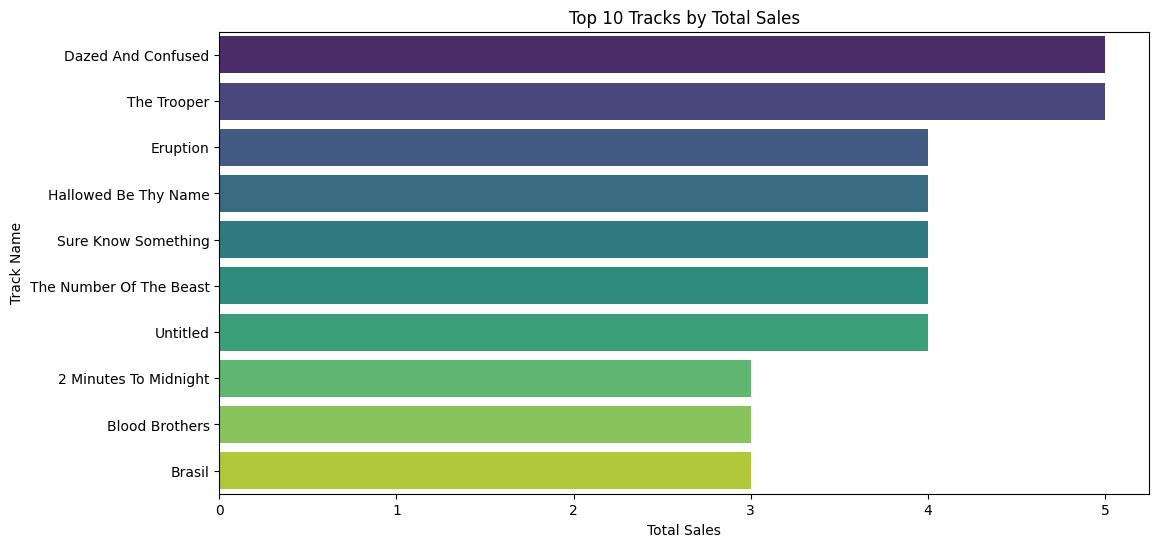

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load CSV file
df_top_tracks = pd.read_csv('top_tracks.csv', header=None)

# Assign proper column names
df_top_tracks.columns = ['Tracks', 'Total_Sales']

# Plot: Top 10 Tracks by Total Sales
plt.figure(figsize=(12, 6))
sns.barplot(x='Total_Sales', y='Tracks', data=df_top_tracks, hue='Tracks', palette='viridis', dodge=False, legend=False)
plt.xlabel('Total Sales')
plt.ylabel('Track Name')
plt.title('Top 10 Tracks by Total Sales')
plt.show()


```sql
--Top 5 Countries by Revenue

SELECT TOP 5 Customer.Country, SUM(Invoice.Total) AS Total_Revenue
FROM Customer
LEFT JOIN Invoice
ON Customer.CustomerId = Invoice.CustomerId
GROUP BY Customer.Country 
ORDER BY SUM(Invoice.Total) DESC

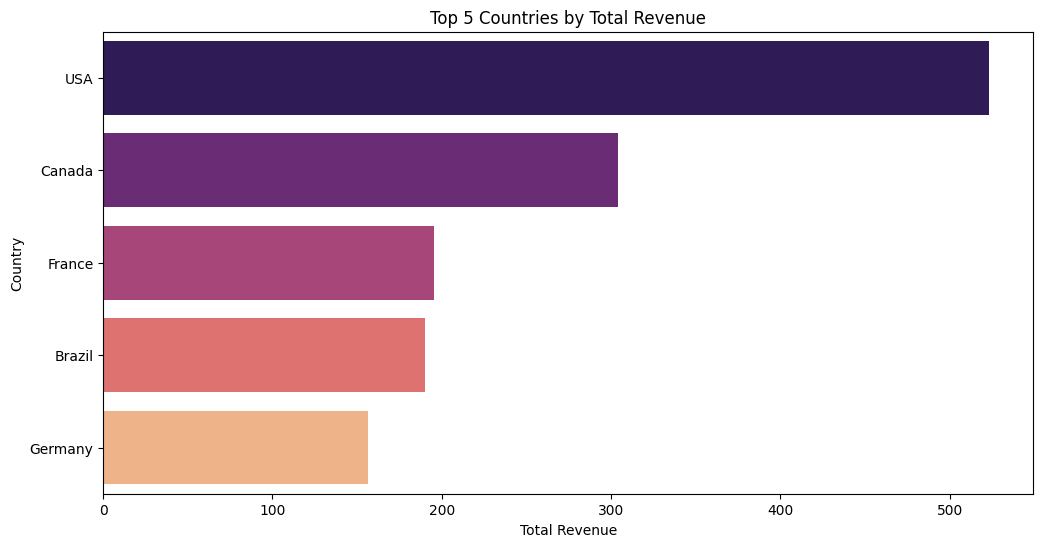

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load CSV file
df_top_countries = pd.read_csv('top_countries.csv', header=None)

# Assign proper column names
df_top_countries.columns = ['Country', 'Total_Revenue']

# Plot: Top 5 Countries by Total Revenue
plt.figure(figsize=(12, 6))
sns.barplot(x='Total_Revenue', y='Country', data=df_top_countries, hue='Country', palette='magma', dodge=False, legend=False)
plt.xlabel('Total Revenue')
plt.ylabel('Country')
plt.title('Top 5 Countries by Total Revenue')
plt.show()


```sql
--Most Popular Genre by Country

SELECT
    Genre.Name AS Genre, 
    Invoice.BillingCountry AS Country, 
    SUM(Invoice.Total) AS Total_Revenue,
    COUNT(InvoiceLine.InvoiceLineId) AS Units_Sold
FROM Invoice
RIGHT JOIN InvoiceLine ON InvoiceLine.InvoiceId = Invoice.InvoiceId
RIGHT JOIN Track ON Track.TrackId = InvoiceLine.TrackId
RIGHT JOIN Genre ON Genre.GenreId = Track.GenreId
GROUP BY Genre.Name, Invoice.BillingCountry
ORDER BY SUM(Invoice.Total) DESC;


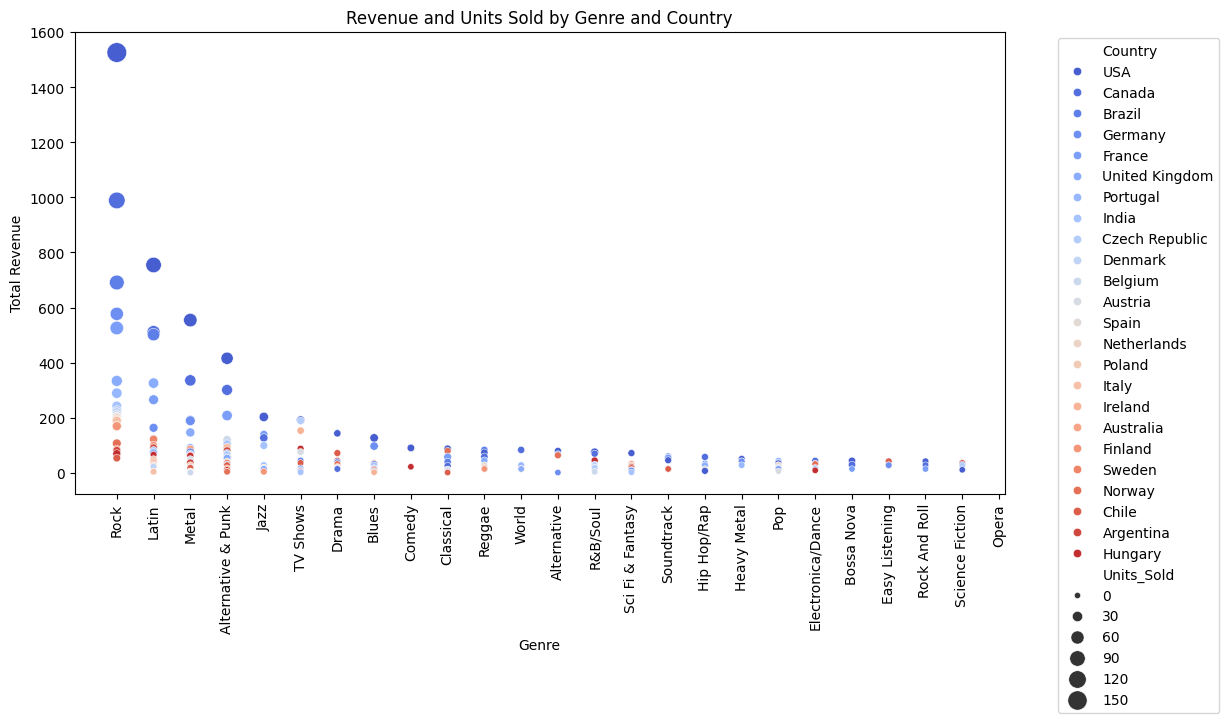

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load CSV file
df_genre_country = pd.read_csv('genre_country.csv', header=None)

# Assign proper column names
df_genre_country.columns = ['Genre', 'Country', 'Total_Revenue', 'Units_Sold']

# Plot: Revenue by Genre and Country
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Genre', y='Total_Revenue', hue='Country', size='Units_Sold', data=df_genre_country, palette='coolwarm', sizes=(20, 200))
plt.xlabel('Genre')
plt.ylabel('Total Revenue')
plt.title('Revenue and Units Sold by Genre and Country')
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


```sql
--Favorite Genre by Customer

SELECT TOP 10 
	Customer.FirstName, 
	Customer.LastName, 
	SUM(Invoice.Total) AS Total_Spent,

		(SELECT TOP 1 Genre.Name
		FROM Track
		JOIN Genre ON Track.GenreId = Genre.GenreId
		JOIN InvoiceLine ON InvoiceLine.TrackId = Track.TrackId 
		WHERE InvoiceLine.InvoiceId IN 
           
	(SELECT InvoiceId 
     FROM Invoice 
     WHERE CustomerId = Customer.CustomerId)
	 GROUP BY Genre.Name
	 ORDER BY COUNT (*) DESC) AS Favourite_Genre

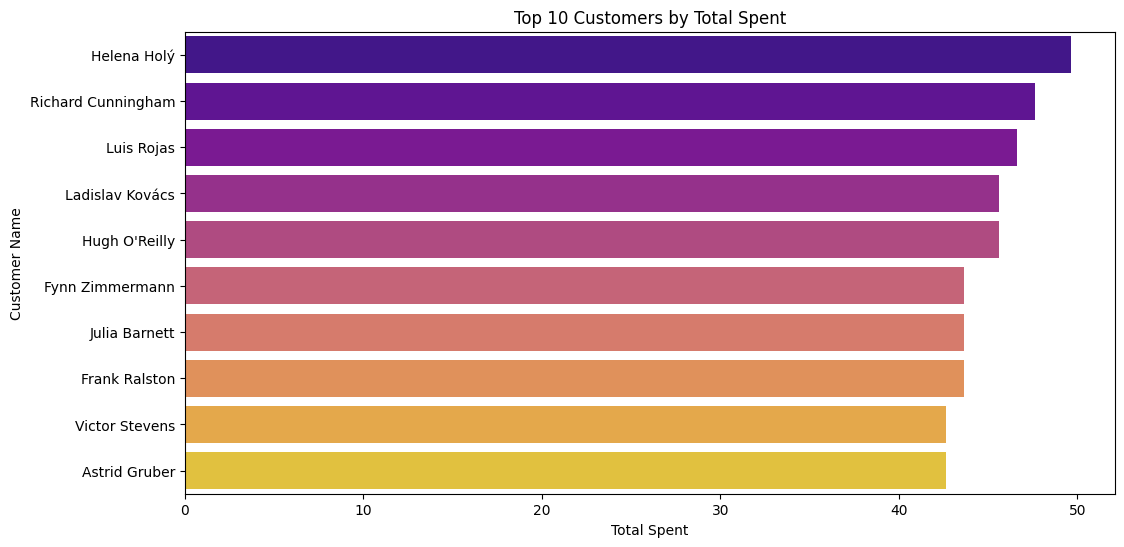

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load CSV file
df_top_customers = pd.read_csv('top_customers.csv', header=None)

# Assign proper column names
df_top_customers.columns = ['Customer_FirstName', 'Customer_LastName', 'Total_Spent', 'Favorite_Genre']
df_top_customers['Customer'] = df_top_customers['Customer_FirstName'] + ' ' + df_top_customers['Customer_LastName']

# Plot: Top 10 Customers by Total Spent
plt.figure(figsize=(12, 6))
sns.barplot(x='Total_Spent', y='Customer', data=df_top_customers.sort_values('Total_Spent', ascending=False).head(10), hue='Customer', palette='plasma', dodge=False, legend=False)
plt.xlabel('Total Spent')
plt.ylabel('Customer Name')
plt.title('Top 10 Customers by Total Spent')
plt.show()


```sql
--Top 3 Performing Employees

SELECT TOP 3
    Employee.FirstName,
    Employee.LastName,
    SUM(Invoice.Total) AS TotalSales
FROM
    Employee
JOIN
    Customer ON Employee.EmployeeId = Customer.SupportRepId
JOIN
    Invoice ON Customer.CustomerId = Invoice.CustomerId
GROUP BY
    Employee.EmployeeId, Employee.FirstName, Employee.LastName
ORDER BY
    TotalSales DESC

  Employee_FirstName Employee_LastName  TotalSales       Employee
0               Jane           Peacock      833.04   Jane Peacock
1           Margaret              Park      775.40  Margaret Park
2              Steve           Johnson      720.16  Steve Johnson


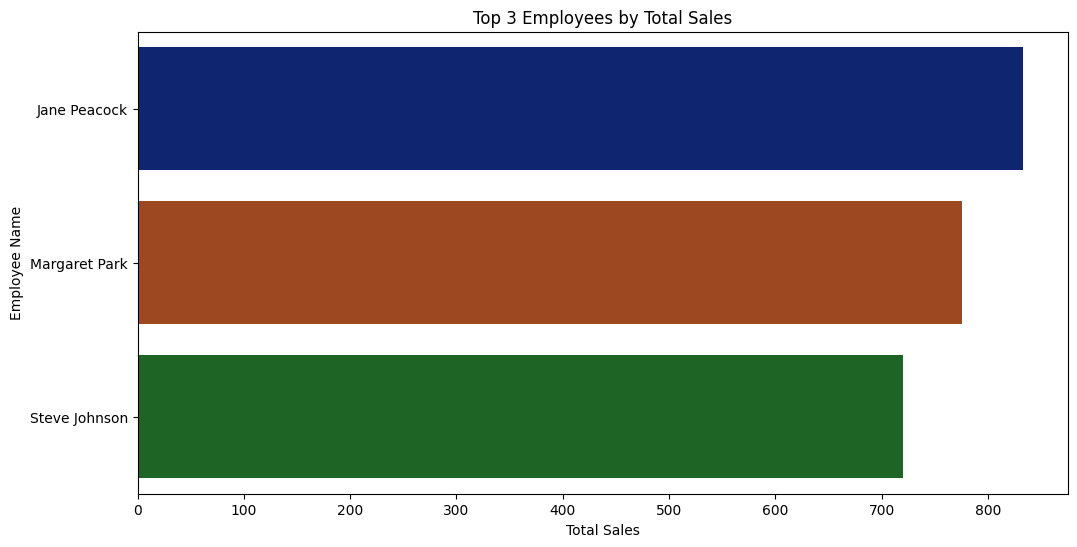

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load CSV file
df_top_employees = pd.read_csv('top_employees.csv', header=None)

# Assign proper column names
df_top_employees.columns = ['Employee_FirstName', 'Employee_LastName', 'TotalSales']

# Combine first and last names into a single column
df_top_employees['Employee'] = df_top_employees['Employee_FirstName'] + ' ' + df_top_employees['Employee_LastName']

# Sort by TotalSales and select top 3 employees
df_top_employees_sorted = df_top_employees.sort_values('TotalSales', ascending=False).head(3)

# Display the sorted data to verify
print(df_top_employees_sorted)

# Plot: Top 3 Employees by Total Sales
plt.figure(figsize=(12, 6))
sns.barplot(x='TotalSales', y='Employee', data=df_top_employees_sorted, hue='Employee', palette='dark', dodge=False, legend=False)
plt.xlabel('Total Sales')
plt.ylabel('Employee Name')
plt.title('Top 3 Employees by Total Sales')
plt.show()


```sql
--Top Artist
	SELECT TOP 1
    Artist.Name AS ArtistName,
    COUNT(PT.PlaylistId) AS PlaylistAppearances
FROM
    Artist
JOIN
    Album ON Artist.ArtistId = Album.ArtistId
JOIN
    Track ON Album.AlbumId = Track.AlbumId
JOIN
    PlaylistTrack PT ON Track.TrackId = PT.TrackId
GROUP BY
    Album.ArtistId, Artist.Name
ORDER BY
    PlaylistAppearances DESC

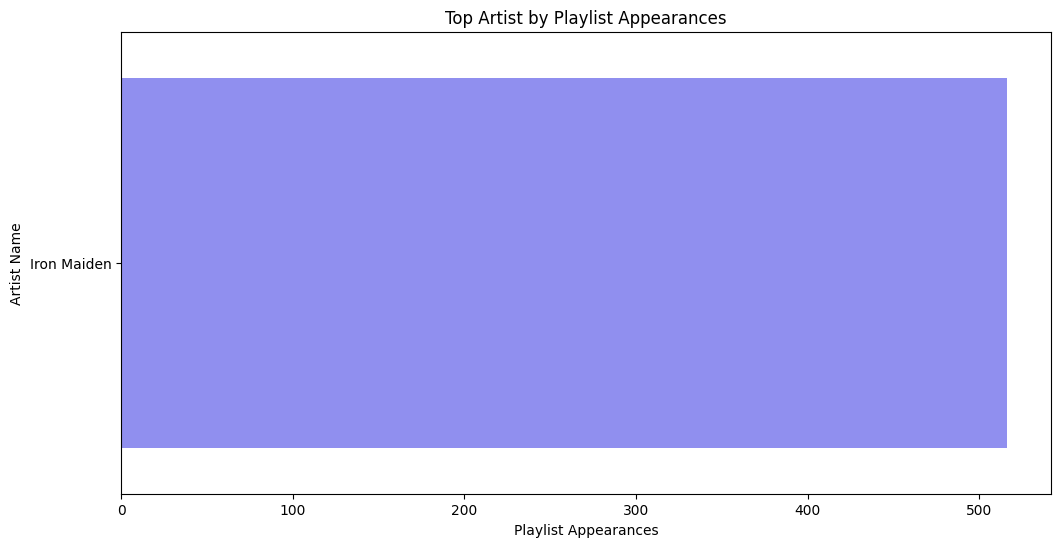

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load CSV file
df_top_artist = pd.read_csv('top_artist.csv', header=None)

# Assign proper column names
df_top_artist.columns = ['ArtistName', 'PlaylistAppearances']

# Plot: Top Artist by Playlist Appearances
plt.figure(figsize=(12, 6))
sns.barplot(x='PlaylistAppearances', y='ArtistName', data=df_top_artist, hue='ArtistName', palette='cool', dodge=False, legend=False)
plt.xlabel('Playlist Appearances')
plt.ylabel('Artist Name')
plt.title('Top Artist by Playlist Appearances')
plt.show()


```sql
-- Top Selling Genre in Canada

SELECT
    Genre.Name AS Genre,
    SUM(InvoiceLine.Quantity * InvoiceLine.UnitPrice) AS TotalSales
FROM
    Customer
JOIN
    Invoice ON Customer.CustomerId = Invoice.CustomerId
JOIN
    InvoiceLine ON Invoice.InvoiceId = InvoiceLine.InvoiceId
JOIN
    Track ON InvoiceLine.TrackId = Track.TrackId
JOIN
    Genre ON Track.GenreId = Genre.GenreId
WHERE
    Customer.Country = 'Canada'
GROUP BY
    Genre.Name
ORDER BY
    TotalSales DESC;

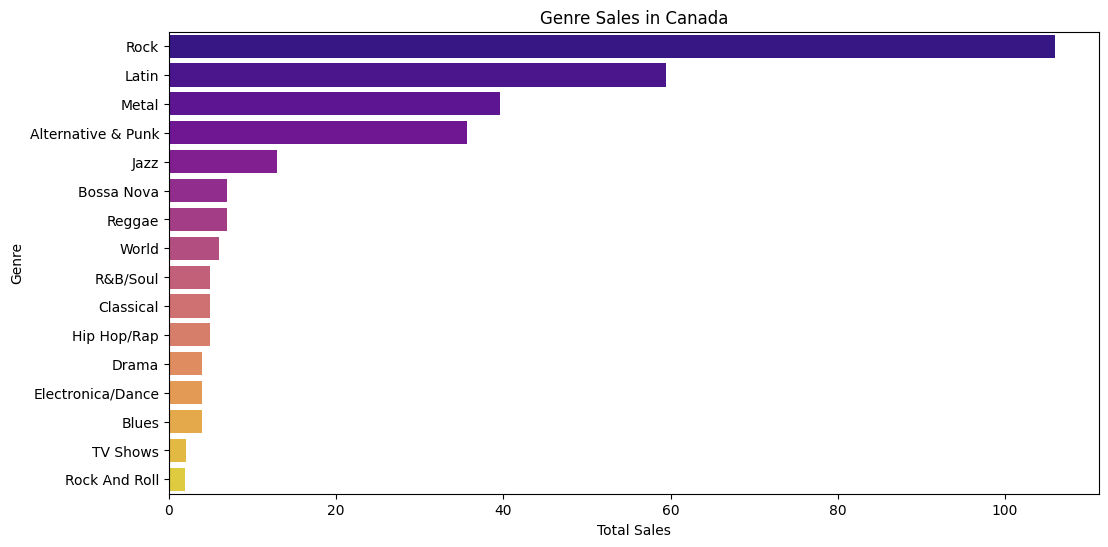

In [9]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load CSV file
df_genre_sales_canada = pd.read_csv('genre_sales_canada.csv', header=None)

# Assign proper column names
df_genre_sales_canada.columns = ['Genre', 'TotalSales']

# Plot: Genre Sales in Canada
plt.figure(figsize=(12, 6))
sns.barplot(x='TotalSales', y='Genre', data=df_genre_sales_canada, hue='Genre', palette='plasma', dodge=False, legend=False)
plt.xlabel('Total Sales')
plt.ylabel('Genre')
plt.title('Genre Sales in Canada')
plt.show()


```sql
--Annual sales over time

SELECT
    FORMAT(InvoiceDate, 'yyyy') AS Year,
    SUM(Total) AS Annual_Sales
FROM Invoice
GROUP BY FORMAT(InvoiceDate, 'yyyy')
ORDER BY Year;

      0       1
0  2021  449.46
1  2022  481.45
2  2023  469.58
3  2024  477.53
4  2025  450.58


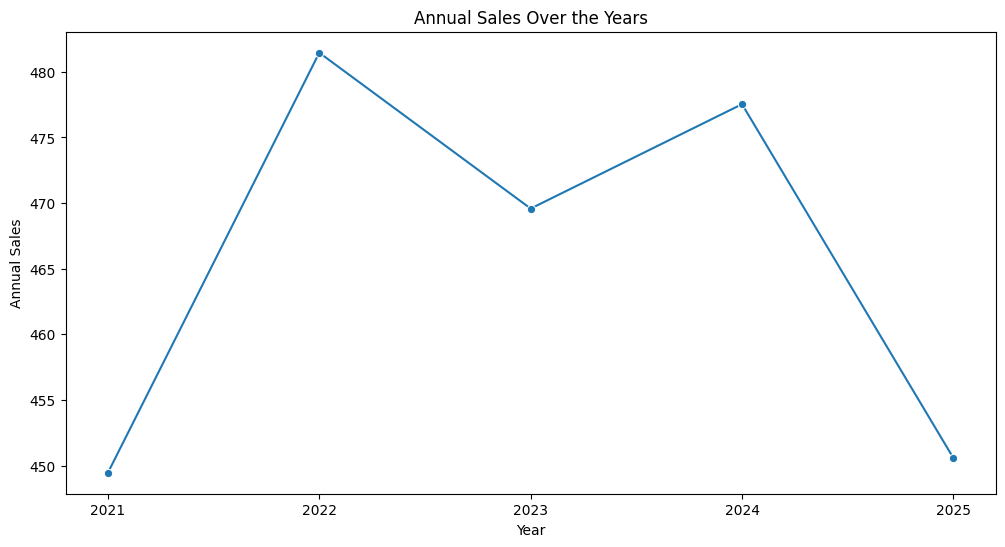

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the annual sales data
file_path = 'annual_sales.csv'  # Use the correct path if the file is elsewhere
df_annual_sales = pd.read_csv(file_path, header=None)

# Display the first few rows of the dataframe
print(df_annual_sales)

# Rename columns assuming the first row is the header
df_annual_sales.columns = ['Year', 'Annual_Sales']

# Ensure 'Year' is treated as a categorical variable
df_annual_sales['Year'] = df_annual_sales['Year'].astype(str)

# Plot the annual sales as a line chart
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Annual_Sales', data=df_annual_sales, marker='o')
plt.xlabel('Year')
plt.ylabel('Annual Sales')
plt.title('Annual Sales Over the Years')
plt.show()


```sql
--Employee Hierarchy

WITH RecursiveEmployeeCTE AS (
    SELECT Employee.EmployeeId, Employee.ReportsTo, Employee.FirstName, Employee.LastName, Employee.Title, 0 AS Level
    FROM Employee
    WHERE ReportsTo IS NULL
    UNION ALL
    SELECT Employee.EmployeeId, Employee.ReportsTo, Employee.FirstName, Employee.LastName, Employee.Title, Level + 1
    FROM Employee
    INNER JOIN RecursiveEmployeeCTE r ON Employee.ReportsTo = r.EmployeeId
)
SELECT * FROM RecursiveEmployeeCTE
ORDER BY Level, ReportsTo;

   ReportsTo  EmployeeId FirstName  LastName                Title  Level
0          2           1     Nancy   Edwards        Sales Manager      1
1          6           1   Michael  Mitchell           IT Manager      1
2          3           2      Jane   Peacock  Sales Support Agent      2
3          4           2  Margaret      Park  Sales Support Agent      2
4          5           2     Steve   Johnson  Sales Support Agent      2


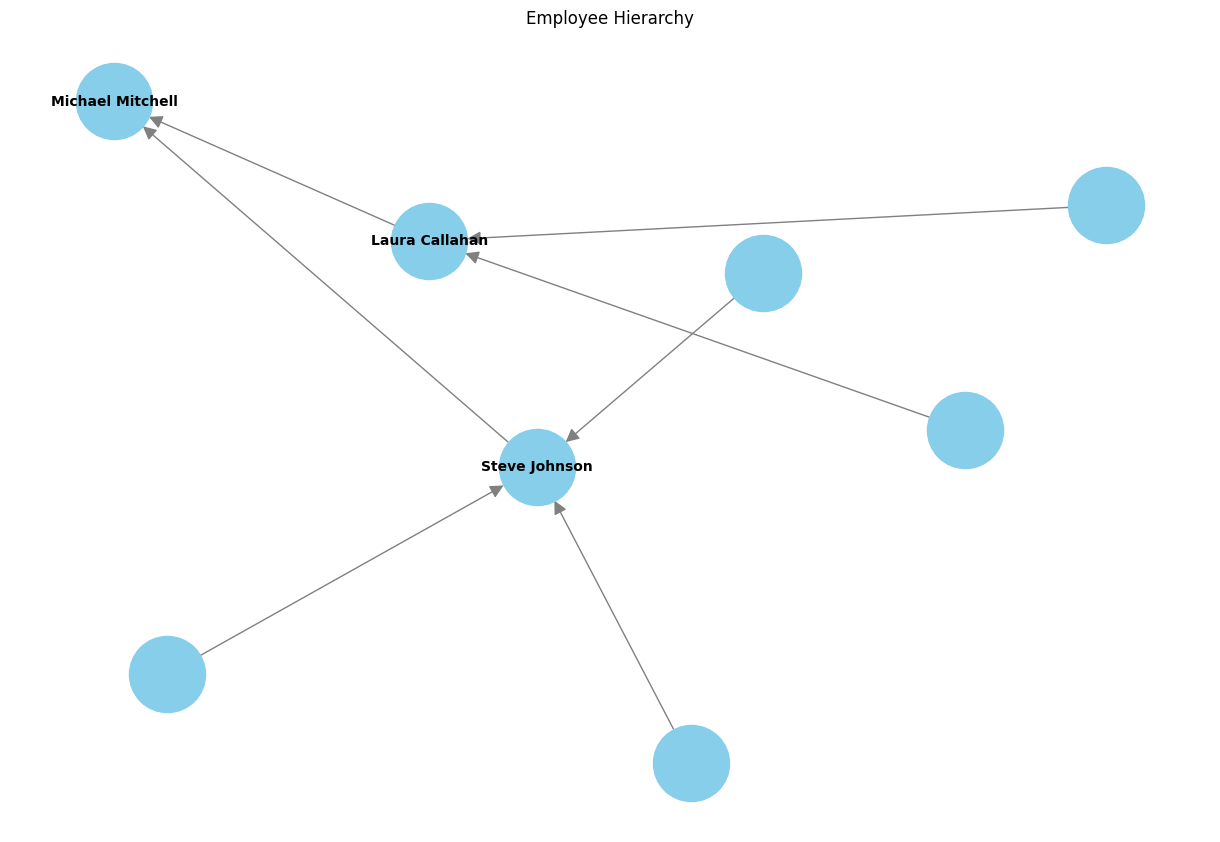

In [11]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load the recursive employees data
file_path = 'recursive_employees.csv'  # Adjust the path as necessary
df_recursive_employees = pd.read_csv(file_path)

# Rename columns if needed
df_recursive_employees.columns = ['ReportsTo', 'EmployeeId', 'FirstName', 'LastName', 'Title', 'Level']

# Display the first few rows of the dataframe
print(df_recursive_employees.head())

# Create a directed graph
G = nx.DiGraph()

# Add nodes and edges
for index, row in df_recursive_employees.iterrows():
    G.add_node(row['EmployeeId'], label=row['FirstName'] + ' ' + row['LastName'])
    if not pd.isnull(row['ReportsTo']):
        G.add_edge(row['ReportsTo'], row['EmployeeId'])

# Draw the graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=0.5, iterations=50)
nx.draw(G, pos, with_labels=True, labels=nx.get_node_attributes(G, 'label'), node_size=3000, node_color="skyblue", font_size=10, font_color="black", font_weight="bold", edge_color="gray", linewidths=1, arrowsize=20)
plt.title('Employee Hierarchy')
plt.show()
